In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
subVar_df=pd.read_excel("sub-variant-3.xlsx")
subVar_df

,Sample,Probability of New Variant (NV) from the testing laboratory,Actual Class
0,34,0.989342,NV
1,3,0.927277,NV
2,20,0.911406,O
3,31,0.896724,NV
4,27,0.875694,O
5,23,0.873166,NV
6,10,0.805518,NV
7,21,0.801078,NV
8,22,0.793945,O
9,32,0.792947,NV


In [7]:
thresholds = [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]

In [13]:
sensi = []
specifi = []

In [23]:
import numpy as np

correct_col_name = 'Probability of New Variant (NV) from the testing laboratory'  # Corrected 'laboratary' to 'laboratory'
actual_class_col = 'Actual Class'

for col in subVar_df.columns:
    if "Probability" in col:
        correct_col_name = col  

sensi = []
specifi = []

for threshold in thresholds:
    predictions = np.where(subVar_df[correct_col_name] >= threshold, 'NV', 'O')
    TP = np.sum((predictions == 'NV') & (subVar_df[actual_class_col] == 'NV'))
    FP = np.sum((predictions == 'NV') & (subVar_df[actual_class_col] == 'O'))
    TN = np.sum((predictions == 'O') & (subVar_df[actual_class_col] == 'O'))
    FN = np.sum((predictions == 'O') & (subVar_df[actual_class_col] == 'NV'))
    
    sensi.append(TP / (TP + FN) if (TP + FN) > 0 else 0)
    specifi.append(TN / (TN + FP) if (TN + FP) > 0 else 0)


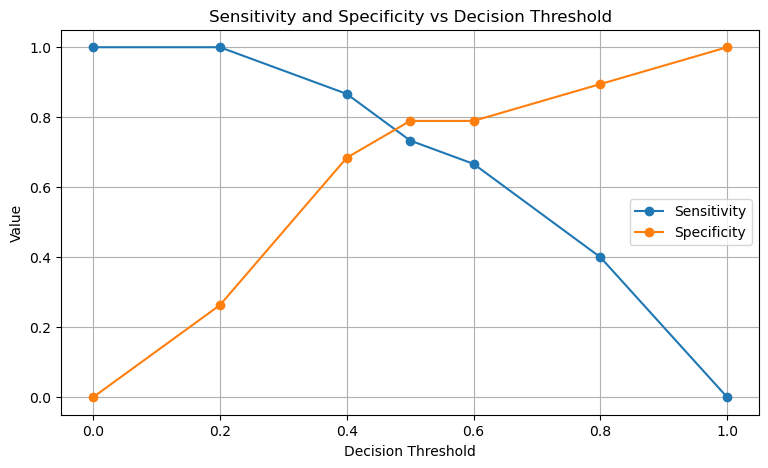

In [25]:
plt.figure(figsize=(9, 5))
plt.plot(thresholds, sensi, label='Sensitivity', marker='o')
plt.plot(thresholds, specifi, label='Specificity', marker='o')
plt.title('Sensitivity and Specificity vs Decision Threshold')
plt.xlabel('Decision Threshold')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Problem 4

ROC Curve and Threshold Analysis

In [29]:
from sklearn.metrics import roc_curve, auc

In [33]:
boston_df=pd.read_excel("Bostonconsultancy-1-1.xlsx")

In [37]:
fpr, tpr, thresholds = roc_curve(boston_df['Actual Class'], boston_df['Probability of winning the opportunity'])
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_tsh = thresholds[optimal_idx]

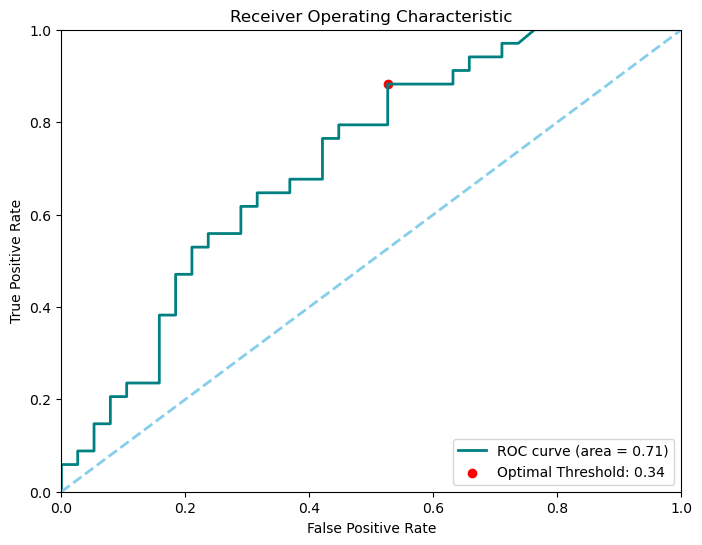

Optimal Threshold: 0.34
AUC: 0.7147832817337462


In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='teal', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--') 
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', 
            label=f'Optimal Threshold: {optimal_tsh:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(f"Optimal Threshold: {optimal_tsh}")
print(f"AUC: {roc_auc}")

Qusetion 2

Performance Metrics Calculation

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [47]:
fpr, tpr, thresholds = roc_curve(boston_df['Actual Class'], boston_df['Probability of winning the opportunity'])
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_tsh = thresholds[optimal_idx]
predications = (boston_df['Probability of winning the opportunity'] >= optimal_tsh).astype(int) 

In [51]:
accuracy = accuracy_score(boston_df['Actual Class'], predications)
precision = precision_score(boston_df['Actual Class'], predications)
recall = recall_score(boston_df['Actual Class'], predications)
f1 = f1_score(boston_df['Actual Class'], predications)

In [53]:
print(f"Optimal Threshold: {optimal_tsh}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Optimal Threshold: 0.34
Accuracy: 0.6666666666666666
Precision: 0.6
Recall: 0.8823529411764706
F1 Score: 0.7142857142857143


Question 3

Profit Maximization Strategy

In [57]:
boston_df['Expected Net Profit'] = (boston_df['Probability of winning the opportunity'] * boston_df['Net Profit']) - boston_df['Service Cost']

In [59]:
top_clients = boston_df.sort_values(by='Expected Net Profit', ascending=False).head(10)

In [61]:
expected_total_net_profit = top_clients['Expected Net Profit'].sum()

In [63]:
print(top_clients[['Companies Name', 'Expected Net Profit']])
print(f"Expected Total Net Profit from Top 10 Clients: {expected_total_net_profit}")

            Companies Name  Expected Net Profit
1   Charter Communications             -336.132
2                      AIG             -336.860
0               Amazon.com             -337.330
12      UnitedHealth Group             -342.436
63          JPMorgan Chase             -342.596
4                Citigroup             -344.542
3                  MetLife             -344.808
7           Morgan Stanley             -350.759
9               Home Depot             -352.100
6                  PepsiCo             -353.204
Expected Total Net Profit from Top 10 Clients: -3440.767
